# Task 1: Data Loading and Preprocessing

In [1]:
# Data Loading
import pandas as pd

# define column names
columns = ['age', 'class_of_worker', 'industry_code', 'occupation_code', 'education', 
           'wage_per_hour', 'enrolled_in_edu_inst_last_week', 'marital_status', 'major_industry_code', 
           'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_labor_union', 'reason_for_unemployment', 
           'full_or_part_time_employment_status', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 
           'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 
           'detailed_household_and_family_status', 'detailed_household_summary_in_household', 
           'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_region', 
           'migration_code_move_within_region', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 
           'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 
           'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 
           'fill_income_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'income']

# load training data
train_data = pd.read_csv('census-income.data', header=None, names=columns)

# preview the first few rows
print(train_data.head())



ModuleNotFoundError: No module named 'pandas'

In [3]:
# Data Cleaning and Preprocessing
# remove rows with missing values
train_data = train_data.dropna()

# encode categorical features
from sklearn.preprocessing import LabelEncoder

# apply label encoding for categorical features
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])

print(train_data.head())


   age  class_of_worker  industry_code  occupation_code  education  \
0   73                3              0                0         12   
1   58                6              4               34         16   
2   18                3              0                0          0   
3    9                3              0                0         10   
4   10                3              0                0         10   

   wage_per_hour  enrolled_in_edu_inst_last_week  marital_status  \
0              0                               2               6   
1              0                               2               0   
2              0                               1               4   
3              0                               2               4   
4              0                               2               4   

   major_industry_code  major_occupation_code  ...  country_of_birth_father  \
0                   14                      6  ...                       40   
1           

# Task 2: Splitting the Data and Training the Model

In [5]:
# Split the Data
from sklearn.model_selection import train_test_split

# separate features (X) and labels (y)
X = train_data.drop('income', axis=1)
y = train_data['income']

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)


Training data size: (139666, 41)
Test data size: (59857, 41)


In [6]:
# Train the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# initialize the DecisionTreeClassifier with a max depth of 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# train the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
# Evaluate the Model
from sklearn.metrics import classification_report, accuracy_score

# predict on the test data
y_pred = clf.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9466394907863742
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     56275
           1       0.77      0.16      0.26      3582

    accuracy                           0.95     59857
   macro avg       0.86      0.58      0.62     59857
weighted avg       0.94      0.95      0.93     59857



# Task 3: Visualizing the Decision Tree

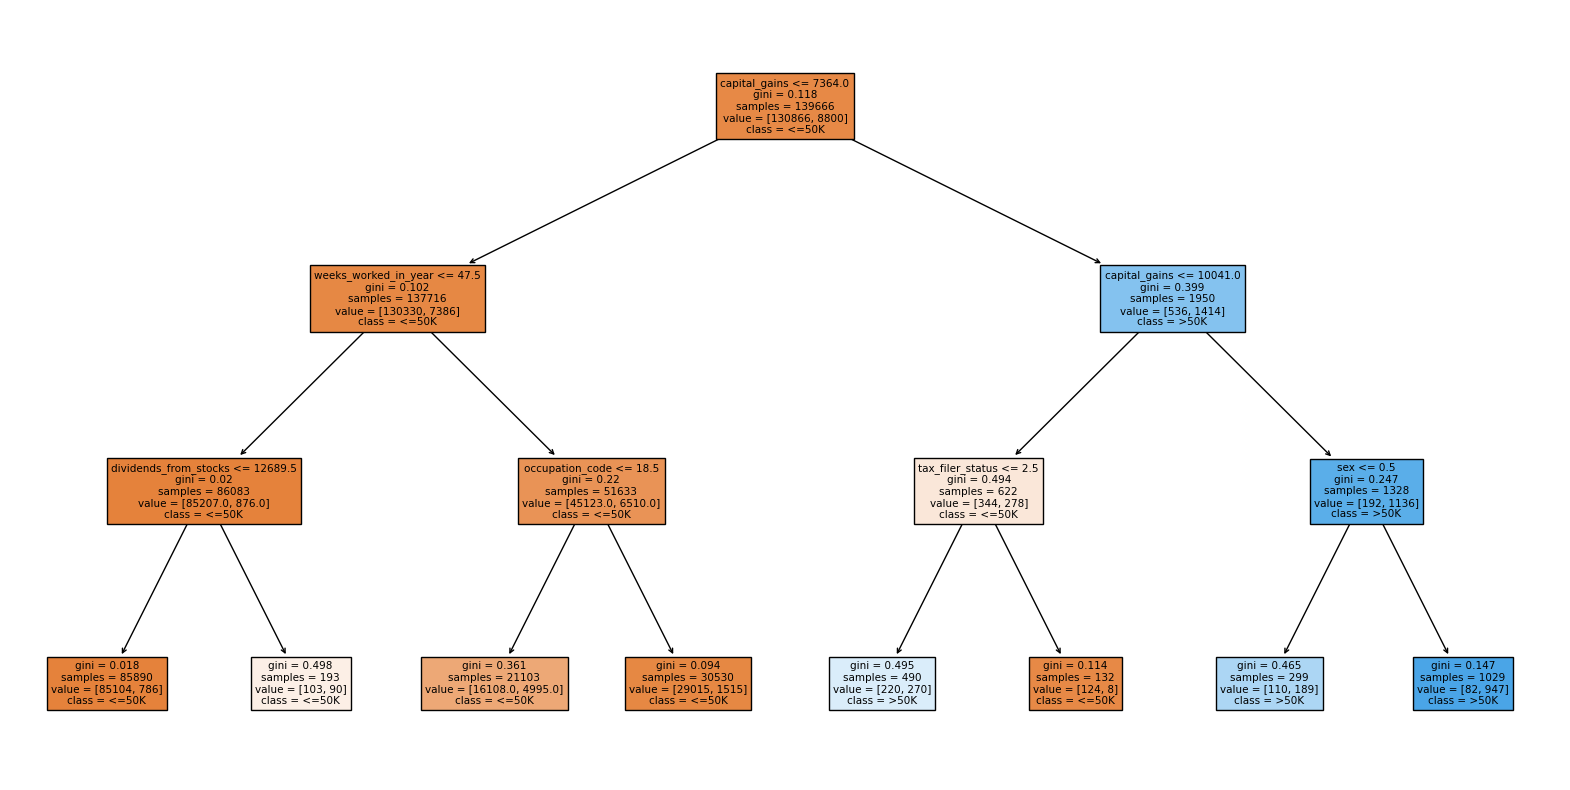

In [9]:
# Visualize Tree
import matplotlib.pyplot as plt
from sklearn import tree

# plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the size of the plot
tree.plot_tree(clf, feature_names=X.columns, class_names=["<=50K", ">50K"], filled=True)
plt.show()

# Task 4: Feature Importance

In [11]:
# Get the feature importance scores
importances = clf.feature_importances_

# create a DataFrame to display the feature importance alongside the feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# display the feature importance
print(feature_importance_df)

                                         Feature  Importance
16                                 capital_gains    0.495484
3                                occupation_code    0.230751
39                          weeks_worked_in_year    0.229113
18                         dividends_from_stocks    0.021268
19                              tax_filer_status    0.013216
12                                           sex    0.010169
0                                            age    0.000000
30               num_persons_worked_for_employer    0.000000
25                  migration_code_change_in_msa    0.000000
26               migration_code_change_in_region    0.000000
27             migration_code_move_within_region    0.000000
28                 live_in_this_house_1_year_ago    0.000000
29                 migration_prev_res_in_sunbelt    0.000000
31                       family_members_under_18    0.000000
23       detailed_household_summary_in_household    0.000000
32                      

One feature might appear as the most important because it provides the highest amount of information gain or reduction in impurity at key decision points within the model. In this model, capital gains is the feature with the highest importance. This makes sense in an income prediction model because capital gains often significantly influences an individual's overall income. 

# Task 5: Evaluation on the Test Set

In [14]:
# Load and Preprocess the test data
# load the test dataset
test_data = pd.read_csv('census-income.test', header=None, names=columns)

# handle missing values (if any)
test_data = test_data.dropna()

# apply label encoding to the test dataset using the same encoders from the training data
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = label_encoders[column].transform(test_data[column])

# separate features (X_test_final) and labels (y_test_final)
X_test_final = test_data.drop('income', axis=1)
y_test_final = test_data['income']


In [15]:
# Evaluate the model on the test dataset
# predict on the final test dataset
y_test_pred = clf.predict(X_test_final)

# evaluate the model on the test dataset
print("Test Accuracy:", accuracy_score(y_test_final, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test_final, y_test_pred))


Test Accuracy: 0.9447369556773553
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     86933
           1       0.77      0.16      0.26      5751

    accuracy                           0.94     92684
   macro avg       0.86      0.58      0.62     92684
weighted avg       0.94      0.94      0.93     92684

